In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv", index_col="PassengerId")
print("Train data loaded")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv", index_col="PassengerId")
print("Test data loaded")

Train data loaded
Test data loaded


In [3]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [6]:
print(train_data.CryoSleep.value_counts())
print('_'*80)
print(train_data.Destination.value_counts())
print('_'*80)
print(train_data.VIP.value_counts())
print('_'*80)
print(train_data.Transported.value_counts())
print(train_data.HomePlanet.value_counts())

False    5439
True     3037
Name: CryoSleep, dtype: int64
________________________________________________________________________________
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
________________________________________________________________________________
False    8291
True      199
Name: VIP, dtype: int64
________________________________________________________________________________
True     4378
False    4315
Name: Transported, dtype: int64
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


In [7]:
train_data["CryoSleep"] = train_data["CryoSleep"].astype(bool)
test_data["CryoSleep"] = test_data["CryoSleep"].astype(bool)

In [8]:
def cabin_split(dataset):
    c = dataset["Cabin"].str.split("/")
    deck= []
    num = []
    side = []

    for i in c.values:
        if type(i) == float:
            deck.append(np.nan)
            num.append(np.nan)
            side.append(np.nan)
        else:
            deck.append(i[0])
            num.append(i[1])
            side.append(i[2])

    dataset['C_Deck'] = deck
    dataset['C_Num'] = num
    dataset['C_Side'] = side
    dataset = dataset.drop('Cabin', inplace=True, axis=1)
    
cabin_split(train_data)
cabin_split(test_data)

In [9]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,C_Deck,C_Num,C_Side
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [10]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,C_Deck,C_Num,C_Side
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [11]:
print(train_data.C_Deck.value_counts())
print('_'*80)
print(train_data.C_Num.value_counts())
print('_'*80)
print(train_data.C_Side.value_counts())

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: C_Deck, dtype: int64
________________________________________________________________________________
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: C_Num, Length: 1817, dtype: int64
________________________________________________________________________________
S    4288
P    4206
Name: C_Side, dtype: int64


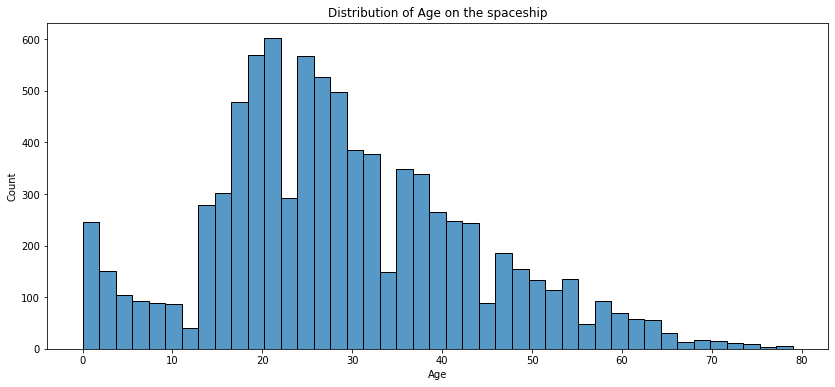

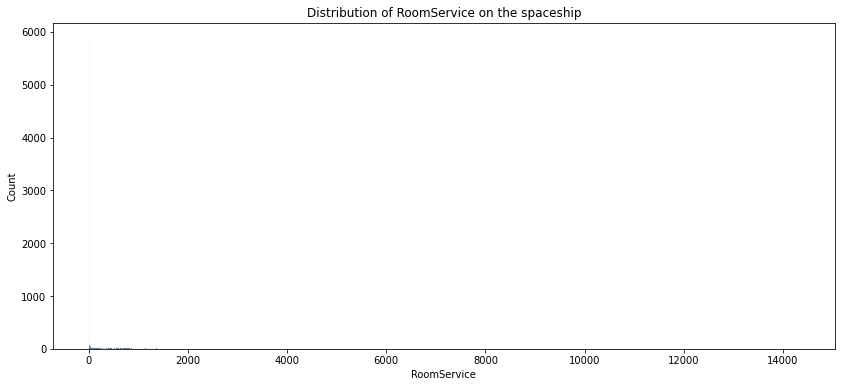

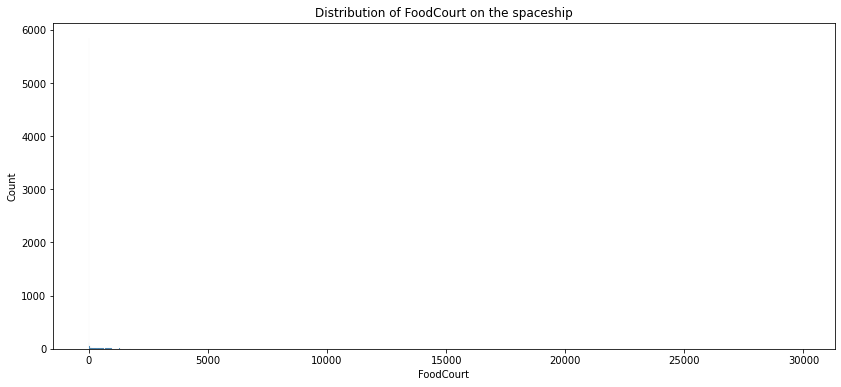

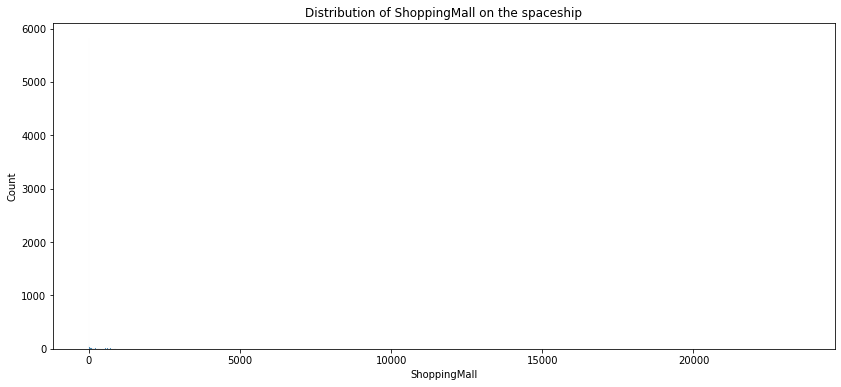

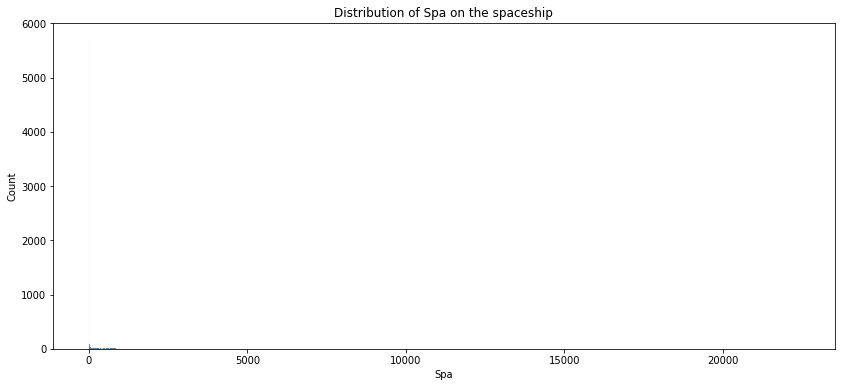

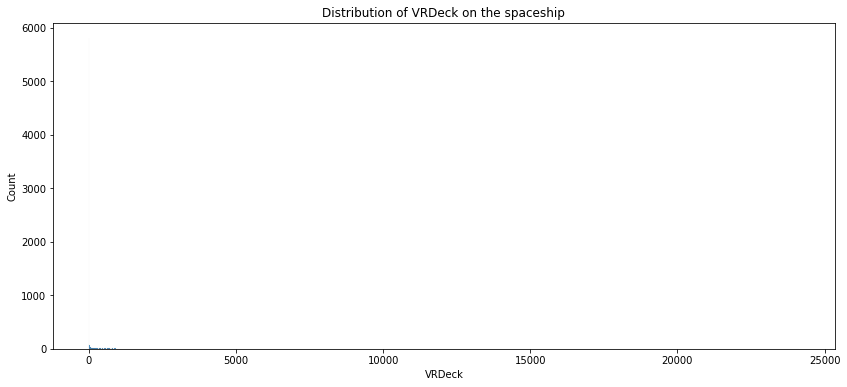

In [12]:
columns = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for column in columns:
    plt.figure(figsize=(14,6), )
    p=sns.histplot(x=column, data=train_data)
    plt.title(f"Distribution of {column} on the spaceship")

Room Service Histogram
AxesSubplot(0.125,0.125;0.775x0.755)


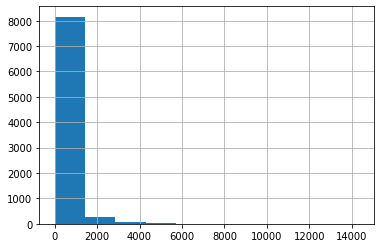

In [13]:
print("Room Service Histogram")
print(train_data['RoomService'].hist())

Food Court Histogram
AxesSubplot(0.125,0.125;0.775x0.755)


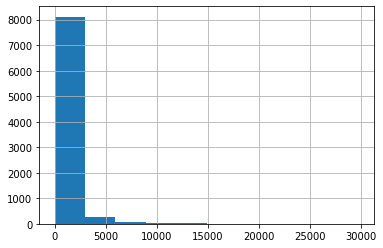

In [14]:
print("Food Court Histogram")
print(train_data['FoodCourt'].hist())

Shopping Mall Histogram
AxesSubplot(0.125,0.125;0.775x0.755)


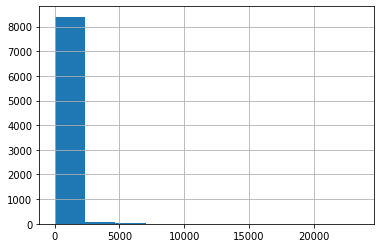

In [15]:
print("Shopping Mall Histogram")
print(train_data['ShoppingMall'].hist())

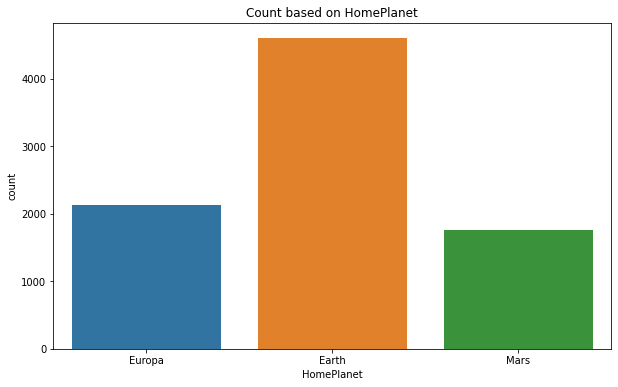

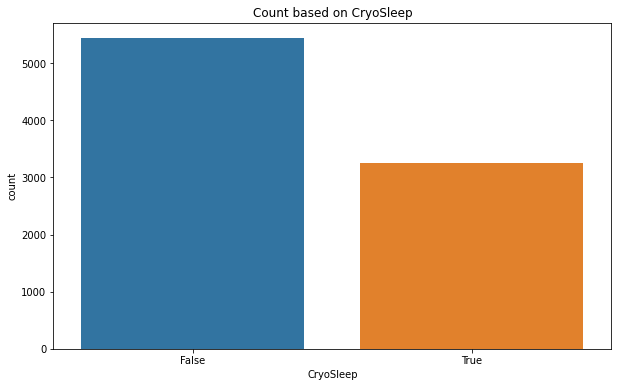

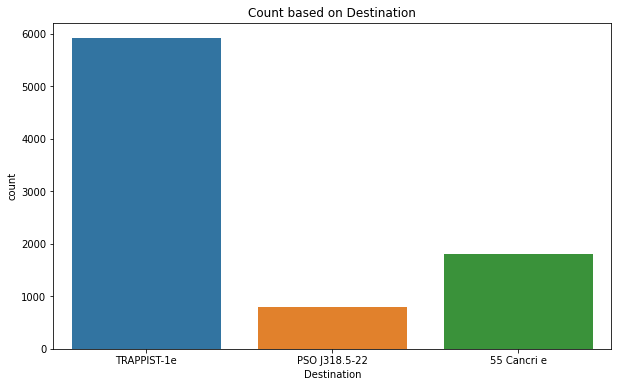

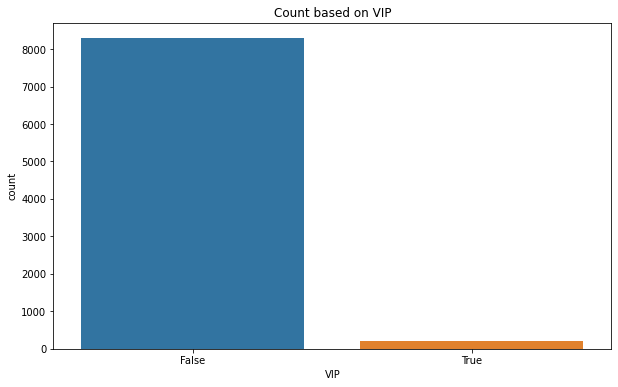

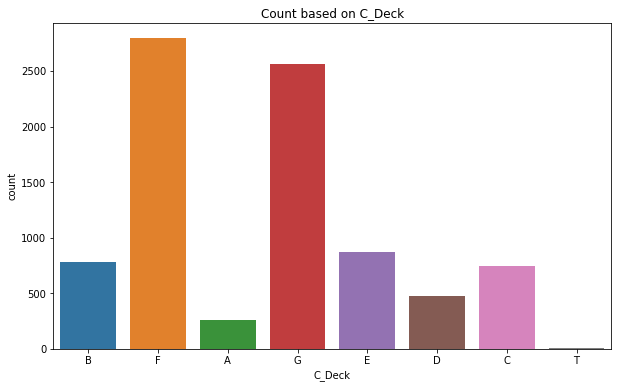

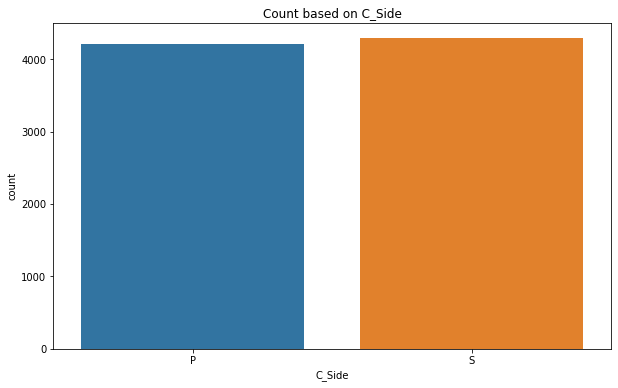

In [16]:
columns = ["HomePlanet","CryoSleep", "Destination", "VIP", "C_Deck", "C_Side"]
for column in columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=train_data[column])
    plt.title(f"Count based on {column}")

Text(0.5, 1.0, 'Distribution of Age in respect to Transported')

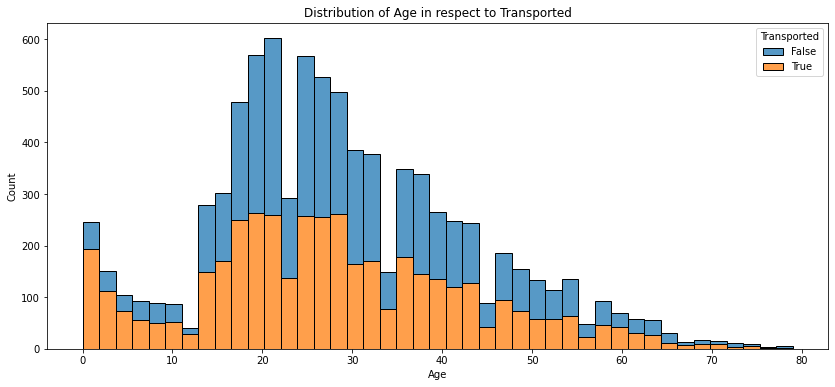

In [17]:
plt.figure(figsize=(14,6))
p=sns.histplot(x='Age', stat='count', multiple='stack', hue='Transported', data=train_data)
plt.title(f"Distribution of Age in respect to Transported")

In [18]:
train_transported= train_data.loc[train_data.Transported == True]
train_not_transported = train_data.loc[train_data.Transported == False]

In [19]:
bins = np.linspace(0,80,43)
age_transported = np.histogram(train_transported.Age, bins=bins, range=(0,80))
age_not_transported = np.histogram(train_not_transported.Age, bins=bins, range=(0,80))

In [20]:
transport_rate = age_transported[0]/(age_transported[0] + age_not_transported[0])

Text(0.5, 1.0, 'Percentage of those who were transported based on age')

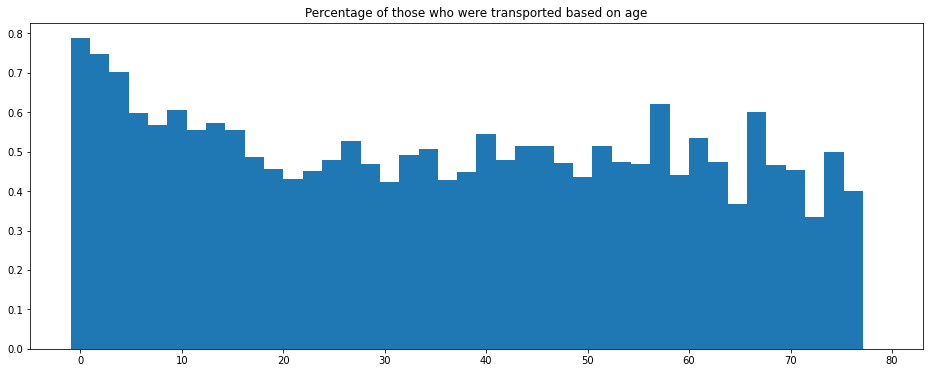

In [21]:
plt.figure(figsize=(16,6))
plt.bar(bins[:-1],transport_rate, width=bins[1]-bins[0])
plt.title("Percentage of those who were transported based on age")

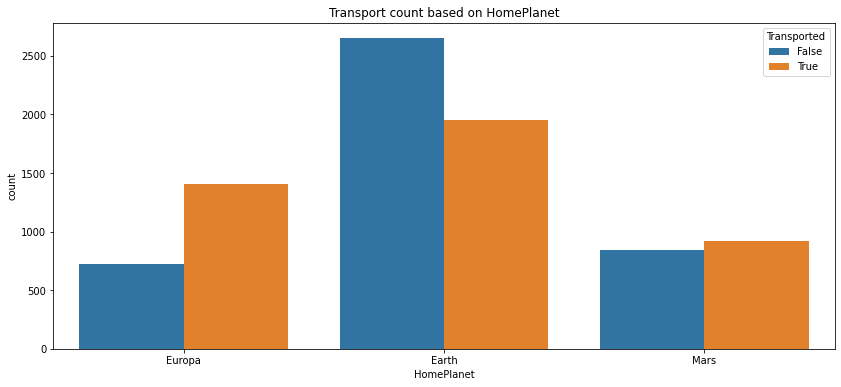

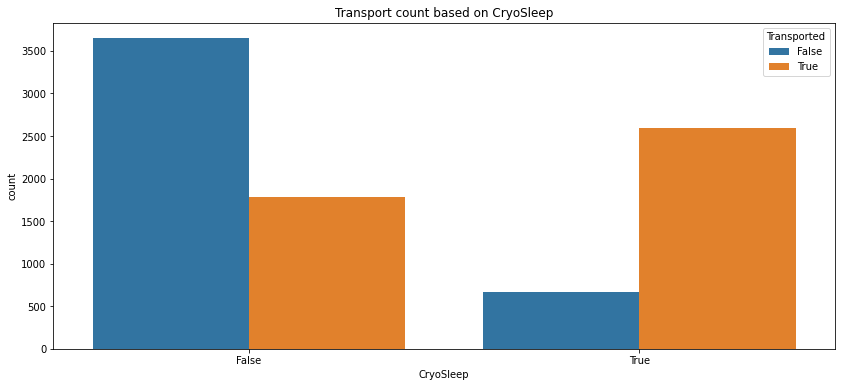

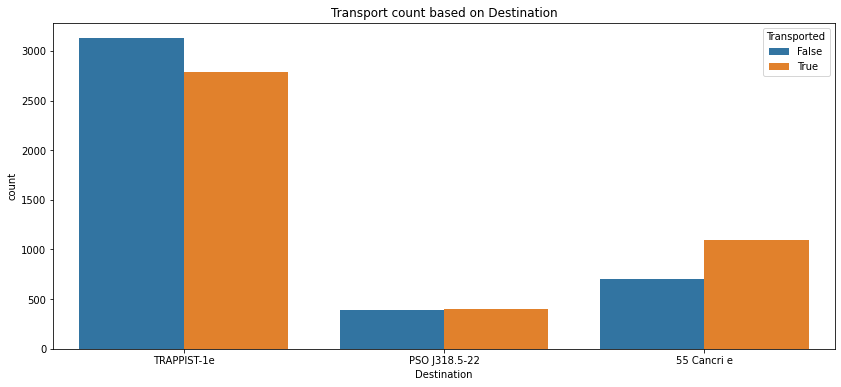

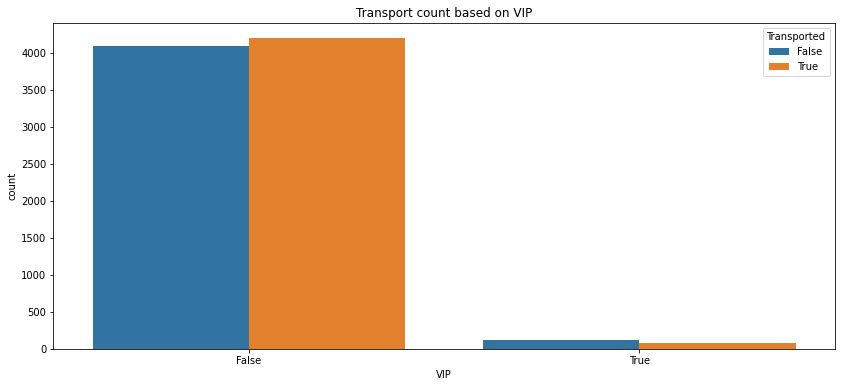

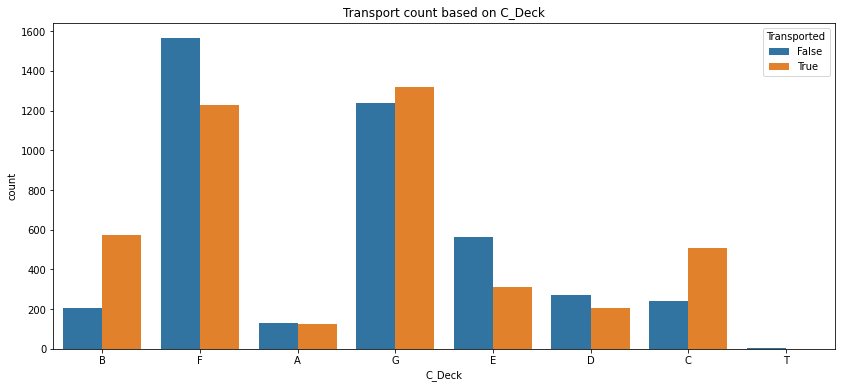

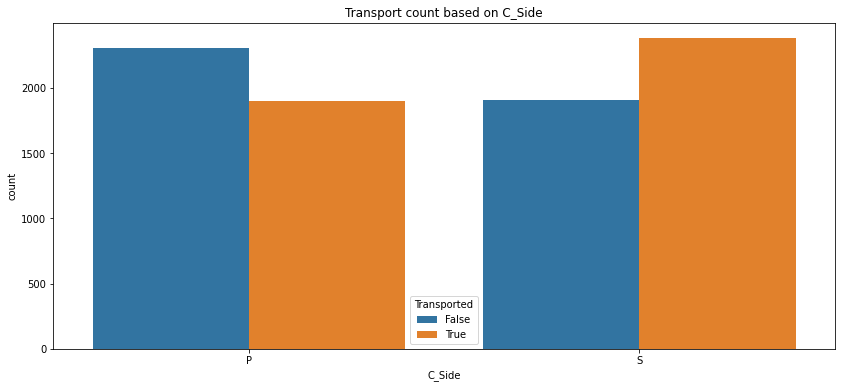

In [22]:
columns = ["HomePlanet","CryoSleep", "Destination", "VIP", "C_Deck", "C_Side"]
for column in columns:
    plt.figure(figsize=(14,6))
    sns.countplot(x=column, hue='Transported', data=train_data)
    plt.title(f'Transport count based on {column}')

In [23]:
def get_percentage(x,y='Transported'):
    train1 = train_data.groupby(x)[y].value_counts(normalize=True)
    train1 = train1.mul(100)
    train1 = train1.rename('percent').reset_index()
    compare = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=train1)
    compare.ax.set_ylim(1,100)
    plt.title(f"Percentage based on {x}")

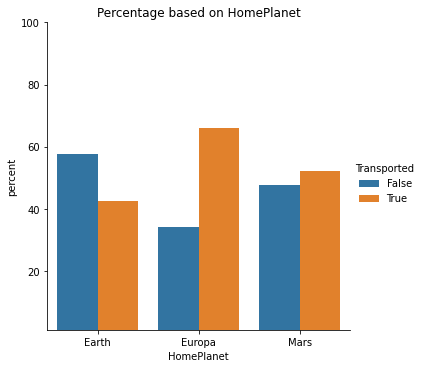

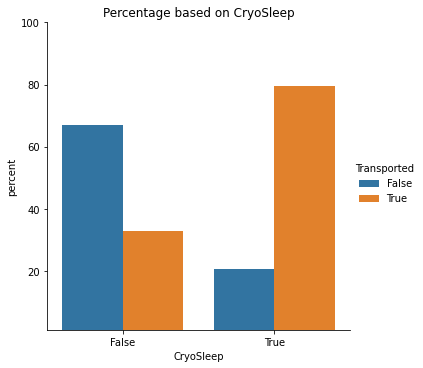

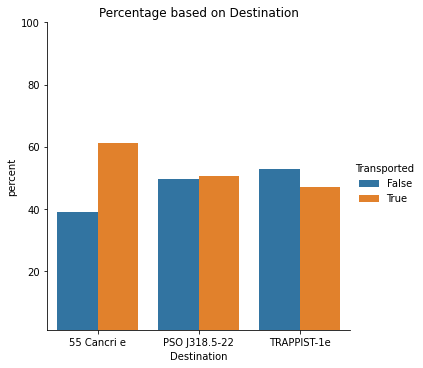

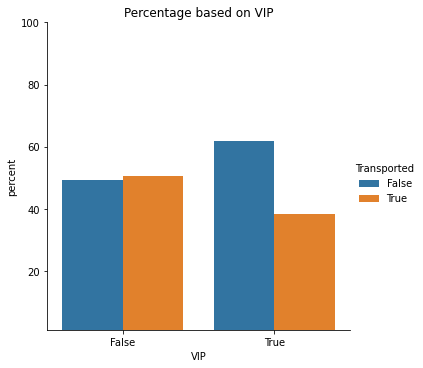

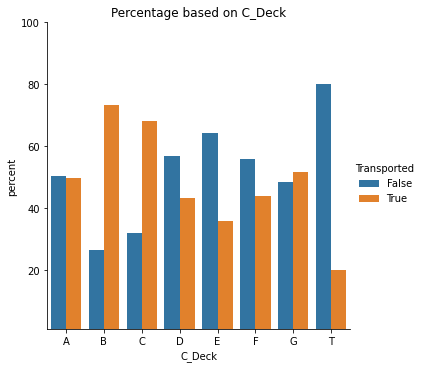

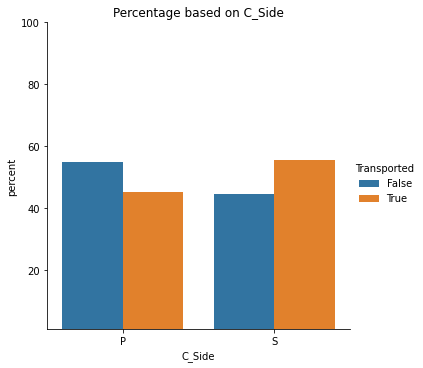

In [24]:
for column in columns:
    get_percentage(column)

In [25]:
def one_hot_encode(dataset, column):
    dummy = pd.get_dummies(dataset[[column]])
    combine = pd.concat([dataset, dummy], axis=1).drop(column, axis=1)
    return combine

In [26]:
columns = ['HomePlanet', 'Destination', 'C_Deck', 'C_Side']
for column in columns:
    train_data = one_hot_encode(train_data,column)
    test_data = one_hot_encode(test_data, column)
    
train_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Name', 'Transported', 'C_Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'C_Deck_A',
       'C_Deck_B', 'C_Deck_C', 'C_Deck_D', 'C_Deck_E', 'C_Deck_F', 'C_Deck_G',
       'C_Deck_T', 'C_Side_P', 'C_Side_S'],
      dtype='object')

<AxesSubplot:>

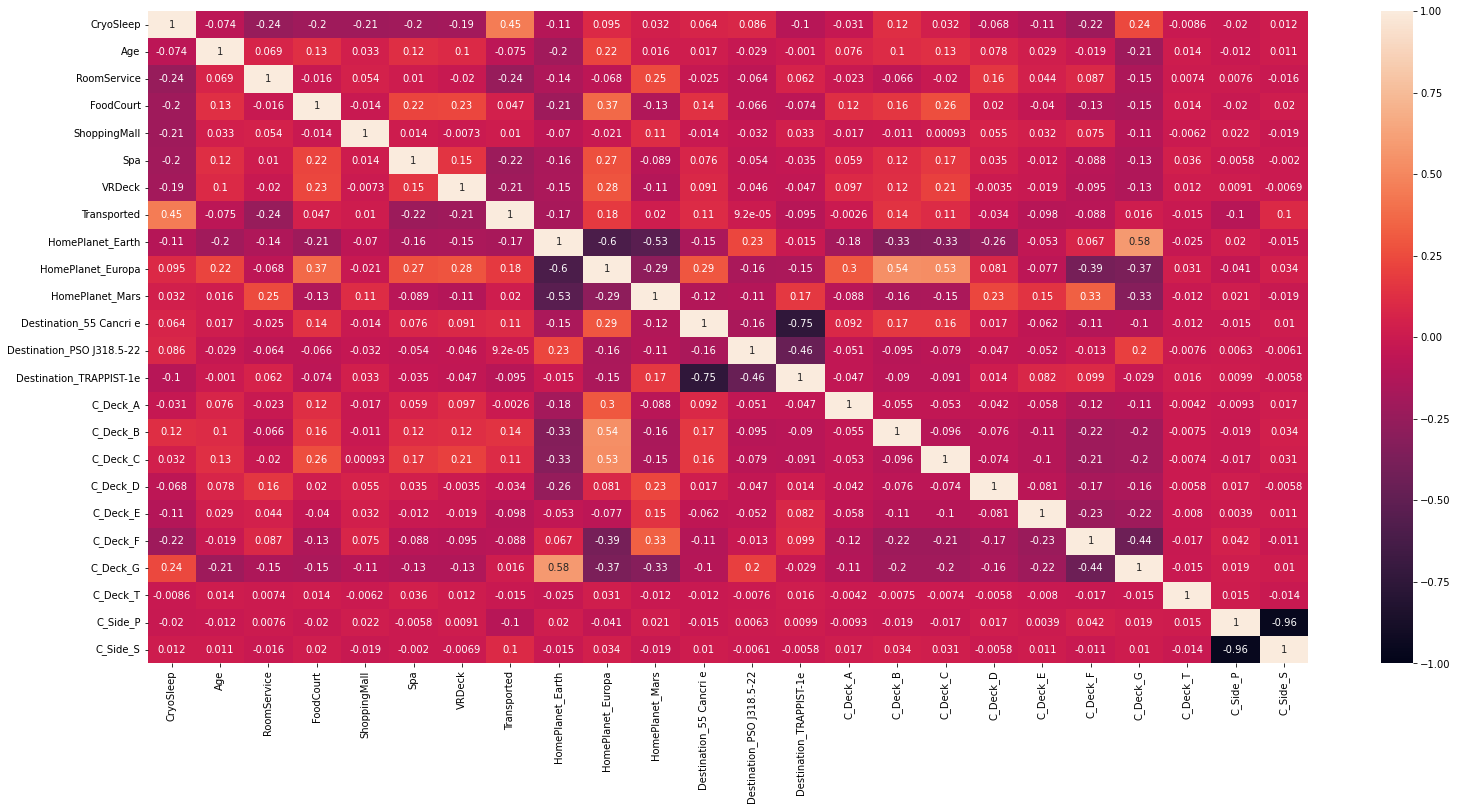

In [27]:
plt.figure(figsize=(26,12))
sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True)

In [28]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

CryoSleep                      0
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Name                         200
Transported                    0
C_Num                        199
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
C_Deck_A                       0
C_Deck_B                       0
C_Deck_C                       0
C_Deck_D                       0
C_Deck_E                       0
C_Deck_F                       0
C_Deck_G                       0
C_Deck_T                       0
C_Side_P                       0
C_Side_S                       0
dtype: int64
CryoSleep                      0
Age                           91
VIP                           

In [29]:
def fill_in(dataset, cols):
    for col in cols:
        dataset[col] = dataset[col].fillna(dataset[col].mean())
    dataset["VIP"] = dataset["VIP"].fillna(False)

In [30]:
cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
fill_in(train_data, cols)
fill_in(test_data, cols)

In [31]:
train_data.drop(["Name", "C_Num"], inplace=True, axis=1)
test_data.drop(["Name", "C_Num"], inplace=True, axis=1)

In [32]:
print(train_data.isnull().sum())
print('_'*80)
print(test_data.isnull().sum())

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
C_Deck_A                     0
C_Deck_B                     0
C_Deck_C                     0
C_Deck_D                     0
C_Deck_E                     0
C_Deck_F                     0
C_Deck_G                     0
C_Deck_T                     0
C_Side_P                     0
C_Side_S                     0
dtype: int64
________________________________________________________________________________
CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCou

In [33]:
from sklearn.model_selection import train_test_split

y = train_data['Transported']
X = train_data.drop(['Transported'], axis=1)
X_test = test_data.copy()

X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [35]:
def model_score(models, X_train, X_valid, y_train, y_valid):
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)
        print(model)
        print(f"Score result= {metrics.accuracy_score(y_valid, predictions)}")
        print('_'*80)

In [36]:
forest = RandomForestClassifier(n_estimators=500)
centroid = NearestCentroid()
K_Neighbor = KNeighborsClassifier(n_neighbors=3)
GaussNB = GaussianNB()
MultiNB = MultinomialNB()
Tree = DecisionTreeClassifier()
svc_model = SVC()
XGB = XGBClassifier(n_estimators=500, learning_rate=0.01)

In [37]:
models = [forest,centroid,K_Neighbor,GaussNB,MultiNB,Tree,svc_model,XGB]
model_score(models,X_train, X_valid, y_train, y_valid)

RandomForestClassifier(n_estimators=500)
Score result= 0.7901092581943646
________________________________________________________________________________
NearestCentroid()
Score result= 0.7096032202415181
________________________________________________________________________________
KNeighborsClassifier(n_neighbors=3)
Score result= 0.7573317998849913
________________________________________________________________________________
GaussianNB()
Score result= 0.726279470960322
________________________________________________________________________________
MultinomialNB()
Score result= 0.7567567567567568
________________________________________________________________________________
DecisionTreeClassifier()
Score result= 0.721679125934445
________________________________________________________________________________
SVC()
Score result= 0.7780333525014376
________________________________________________________________________________
XGBClassifier(base_score=0.5, booster='gbtree', c

In [38]:
XGB.fit(X_train, y_train)
final_predict = XGB.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test.index, 'Survived':final_predict})
output['Survived'] = output['Survived'].astype(bool)
output

,PassengerId,Survived
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
